### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
credit_card_data=pd.read_csv('credit_card_clean.csv')

In [3]:
credit_card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Data Understanding

In [4]:
credit_card_data.shape

(30000, 25)

In [5]:
credit_card_data.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

In [6]:
credit_card_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [7]:
credit_card_data['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: int64

In [8]:
credit_card_data['EDUCATION'].value_counts()

university    14030
grad          10585
highschool     4917
other           468
Name: EDUCATION, dtype: int64

In [9]:
credit_card_data['MARRIAGE'].value_counts()

single     15964
married    13659
other        377
Name: MARRIAGE, dtype: int64

### Data Preparation

In [10]:
del credit_card_data['ID']

In [11]:
credit_card_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,female,university,married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
le=LabelEncoder()
credit_card_data['SEX']=le.fit_transform(credit_card_data['SEX'])
credit_card_data['EDUCATION']=le.fit_transform(credit_card_data['EDUCATION'])
credit_card_data['MARRIAGE']=le.fit_transform(credit_card_data['MARRIAGE'])

In [13]:
credit_card_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
credit_card_data.dtypes

LIMIT_BAL    float64
SEX            int32
EDUCATION      int32
MARRIAGE       int32
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

### Model Building

In [15]:
X=credit_card_data.drop('DEFAULT',axis=1)
y=credit_card_data[['DEFAULT']]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12,shuffle=True,stratify=y)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24000, 23), (6000, 23), (24000, 1), (6000, 1))

### Model Training

In [18]:
rf_classifier=RandomForestClassifier(n_estimators=100)
adb_classifier=AdaBoostClassifier(n_estimators=100)
gb_classifier=GradientBoostingClassifier(n_estimators=100)
xgb_classifier=XGBClassifier(n_estimators=100)
lgbm_classifier=LGBMClassifier(n_estimators=100)

### Training Time Analysis

In [19]:
%%time
rf_classifier.fit(X_train,y_train)

Wall time: 5.05 s


RandomForestClassifier()

In [20]:
%%time
adb_classifier.fit(X_train,y_train)

Wall time: 3.28 s


AdaBoostClassifier(n_estimators=100)

In [21]:
%%time
gb_classifier.fit(X_train,y_train)

Wall time: 7.19 s


GradientBoostingClassifier()

In [22]:
%%time
xgb_classifier.fit(X_train,y_train)

Wall time: 1.74 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [23]:
%%time
lgbm_classifier.fit(X_train,y_train)

Wall time: 189 ms


LGBMClassifier()

### Model Testing

In [24]:
y_pred_rf=rf_classifier.predict(X_test)
y_pred_adb=adb_classifier.predict(X_test)
y_pred_gb=gb_classifier.predict(X_test)
y_pred_xgb=xgb_classifier.predict(X_test)
y_pred_lgbm=lgbm_classifier.predict(X_test)

### Model Evaluation

In [25]:
print('Accuracy of Random Forest Classifier :',accuracy_score(y_test,y_pred_rf))
print('Accuracy of Adaboost Classifier :',accuracy_score(y_test,y_pred_adb))
print('Accuracy of Gradient Boosting Classifier :',accuracy_score(y_test,y_pred_gb))
print('Accuracy of Xtreme Gradient Boosting Classifier :',accuracy_score(y_test,y_pred_xgb))
print('Accuracy of Light Gradient Boosting Classifier :',accuracy_score(y_test,y_pred_lgbm))

Accuracy of Random Forest Classifier : 0.8185
Accuracy of Adaboost Classifier : 0.8198333333333333
Accuracy of Gradient Boosting Classifier : 0.8248333333333333
Accuracy of Xtreme Gradient Boosting Classifier : 0.8153333333333334
Accuracy of Light Gradient Boosting Classifier : 0.822


In [26]:
print('ROC Score of Random Forest Classifier :',roc_auc_score(y_test,y_pred_rf))
print('ROC Score of Adaboost Classifier :',roc_auc_score(y_test,y_pred_adb))
print('ROC Score of Gradient Boosting Classifier :',roc_auc_score(y_test,y_pred_gb))
print('ROC Score of Xtreme Gradient Boosting Classifier :',roc_auc_score(y_test,y_pred_xgb))
print('ROC Score of Light Gradient Boosting Classifier :',roc_auc_score(y_test,y_pred_lgbm))

ROC Score of Random Forest Classifier : 0.6579333634464111
ROC Score of Adaboost Classifier : 0.6461091156672776
ROC Score of Gradient Boosting Classifier : 0.661729481891112
ROC Score of Xtreme Gradient Boosting Classifier : 0.6548212397503592
ROC Score of Light Gradient Boosting Classifier : 0.6564032245397609


### ======================================================================================

### Feature Importance

In [27]:
rf_features=rf_classifier.feature_importances_
adb_features=adb_classifier.feature_importances_
gb_features=gb_classifier.feature_importances_
xgb_features=xgb_classifier.feature_importances_
lgbm_features=lgbm_classifier.feature_importances_

In [28]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [29]:
feature_importance = pd.DataFrame({'Features':X.columns,
                                   'rf_features':rf_features,
                                   'adb_features':adb_features,
                                   'gb_features':gb_features,
                                   'xgb_features':xgb_features,
                                   'lgbm_features':lgbm_features})
feature_importance

,Features,rf_features,adb_features,gb_features,xgb_features,lgbm_features
0,LIMIT_BAL,0.061997,0.04,0.032666,0.024132,215
1,SEX,0.012258,0.01,0.002271,0.017697,35
2,EDUCATION,0.018680,0.00,0.002574,0.020403,64
3,MARRIAGE,0.013101,0.01,0.004917,0.020488,36
4,AGE,0.065869,0.04,0.006142,0.017460,201
5,PAY_1,0.091750,0.13,0.630199,0.356028,103
6,PAY_2,0.048685,0.07,0.083209,0.117766,44
7,PAY_3,0.026558,0.02,0.032262,0.049169,50
8,PAY_4,0.021227,0.02,0.017907,0.041508,37
9,PAY_5,0.020449,0.03,0.015874,0.042685,37


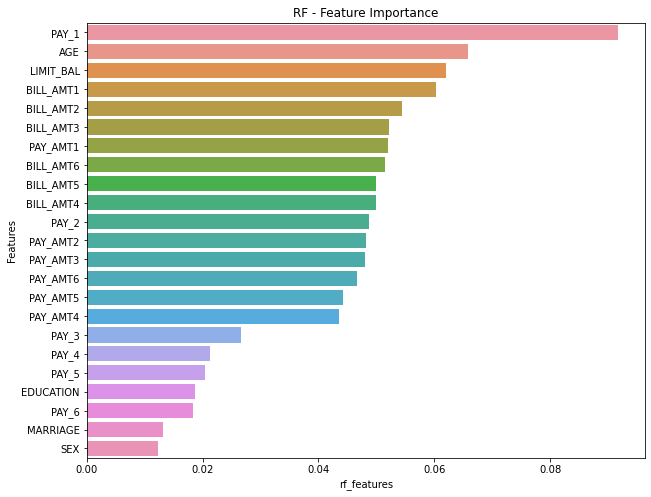

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x='rf_features',y='Features',data=feature_importance.sort_values(by='rf_features',ascending=False))
plt.title('RF - Feature Importance')
plt.show()

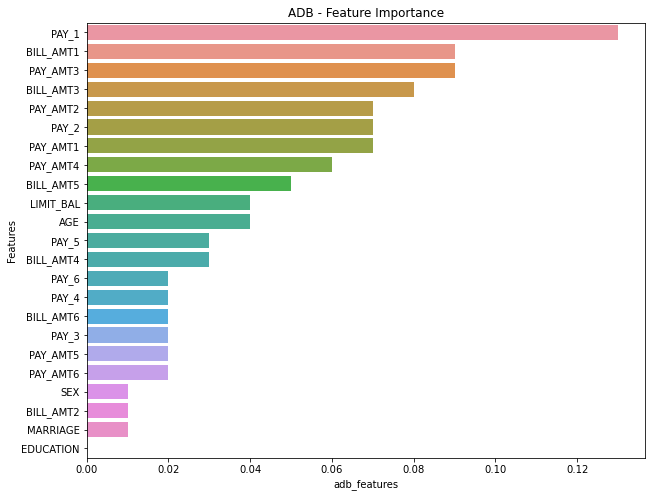

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(x='adb_features',y='Features',data=feature_importance.sort_values(by='adb_features',ascending=False))
plt.title('ADB - Feature Importance')
plt.show()

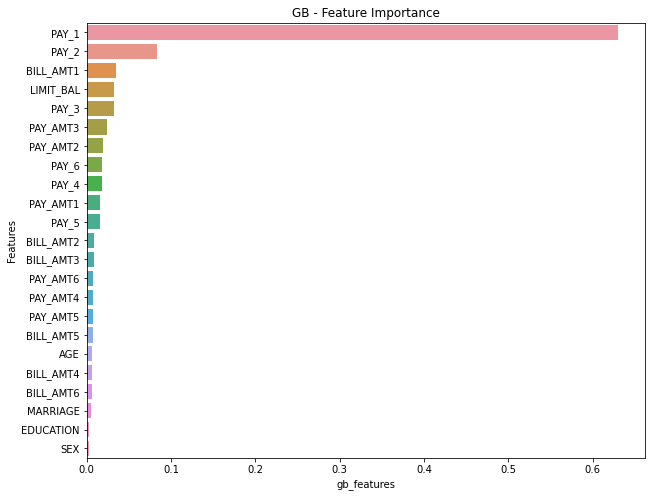

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x='gb_features',y='Features',data=feature_importance.sort_values(by='gb_features',ascending=False))
plt.title('GB - Feature Importance')
plt.show()

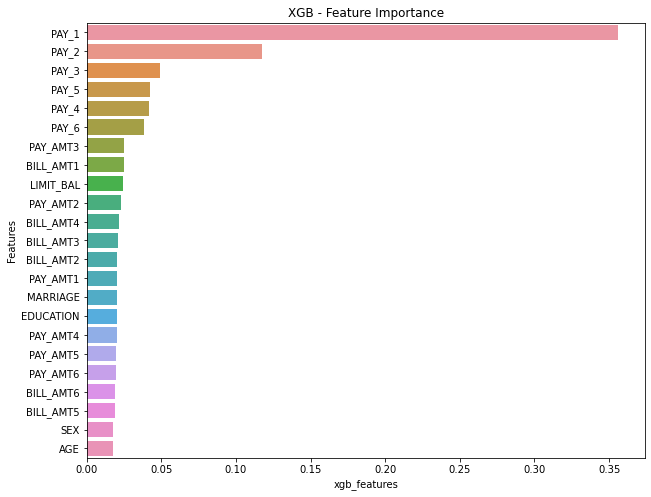

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x='xgb_features',y='Features',data=feature_importance.sort_values(by='xgb_features',ascending=False))
plt.title('XGB - Feature Importance')
plt.show()

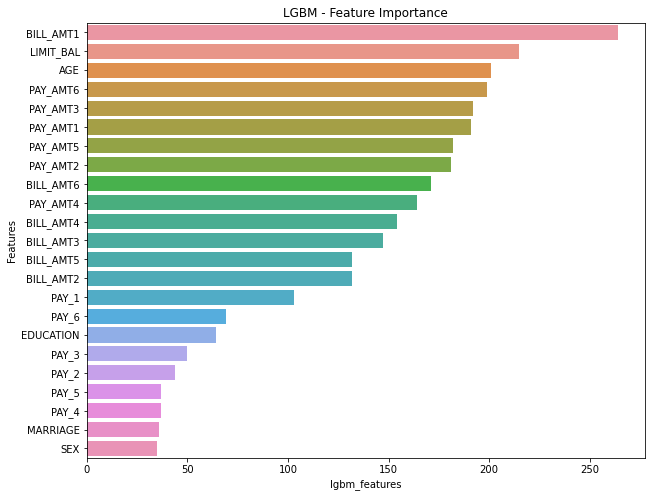

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(x='lgbm_features',y='Features',data=feature_importance.sort_values(by='lgbm_features',ascending=False))
plt.title('LGBM - Feature Importance')
plt.show()

### End !!!